In [1]:
pip install pandas matplotlib seaborn wordcloud plotly streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# --- Cell 1: Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import os, json

plt.rcParams['figure.dpi'] = 120
sns.set_theme(style="whitegrid")

# --- Cell 2: Load dataset (US as example) ---
df = pd.read_csv("data/USvideos.csv")
print("Shape:", df.shape)
df.head()

Shape: (40949, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
# --- Cell 3: EDA ---
print(df.info())
print(df.isna().sum())
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

,count,mean,std,min,25%,50%,75%,max
category_id,40949.0,1.997243e+01,7.568327e+00,1.0,17.0,24.0,25.0,43.0
views,40949.0,2.360785e+06,7.394114e+06,549.0,242329.0,681861.0,1823157.0,225211923.0
likes,40949.0,7.426670e+04,2.288853e+05,0.0,5424.0,18091.0,55417.0,5613827.0
dislikes,40949.0,3.711401e+03,2.902971e+04,0.0,202.0,631.0,1938.0,1674420.0
comment_count,40949.0,8.446804e+03,3.743049e+04,0.0,614.0,1856.0,5755.0,1361580.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11440\745028033.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_views.values, y=avg_views.index, palette="viridis")


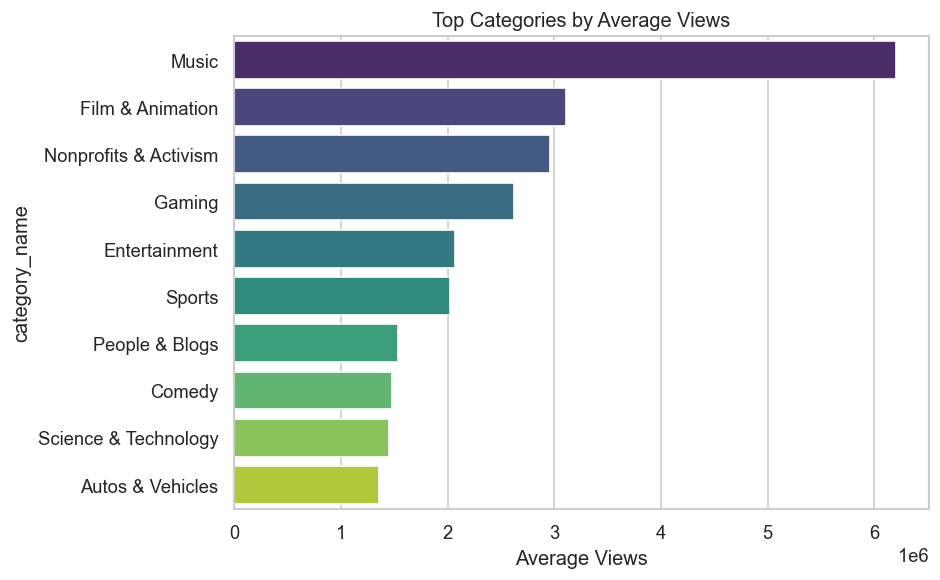

In [4]:
# --- Cell 4: Load category mapping ---
with open("data/US_category_id.json", "r") as f:
    cats = json.load(f)

cat_map = {int(item['id']): item['snippet']['title'] for item in cats['items']}
df['category_name'] = df['category_id'].map(cat_map)

# --- Cell 5: Plot avg views ---
avg_views = df.groupby('category_name')['views'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_views.values, y=avg_views.index, palette="viridis")
plt.title("Top Categories by Average Views")
plt.xlabel("Average Views")
plt.tight_layout()
plt.show()

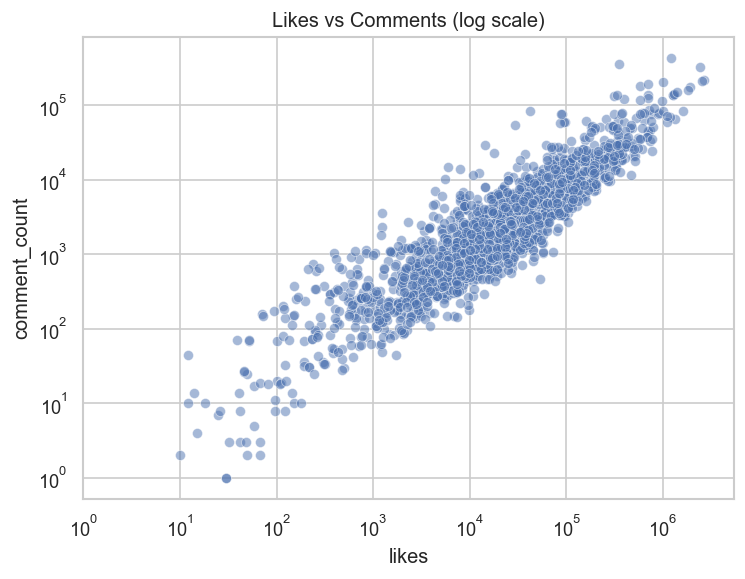

In [5]:
# --- Cell 6: Likes vs Comments ---
sample = df.sample(2000, random_state=42)
plt.figure(figsize=(7,5))
sns.scatterplot(x="likes", y="comment_count", data=sample, alpha=0.5)
plt.xscale("log")
plt.yscale("log")
plt.title("Likes vs Comments (log scale)")
plt.show()

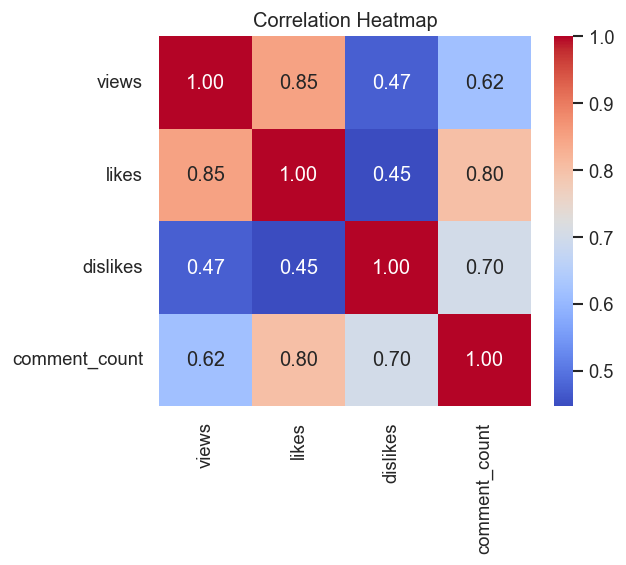

In [6]:
# --- Cell 7: Correlation ---
num_cols = ["views","likes","dislikes","comment_count"]
corr = df[num_cols].corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

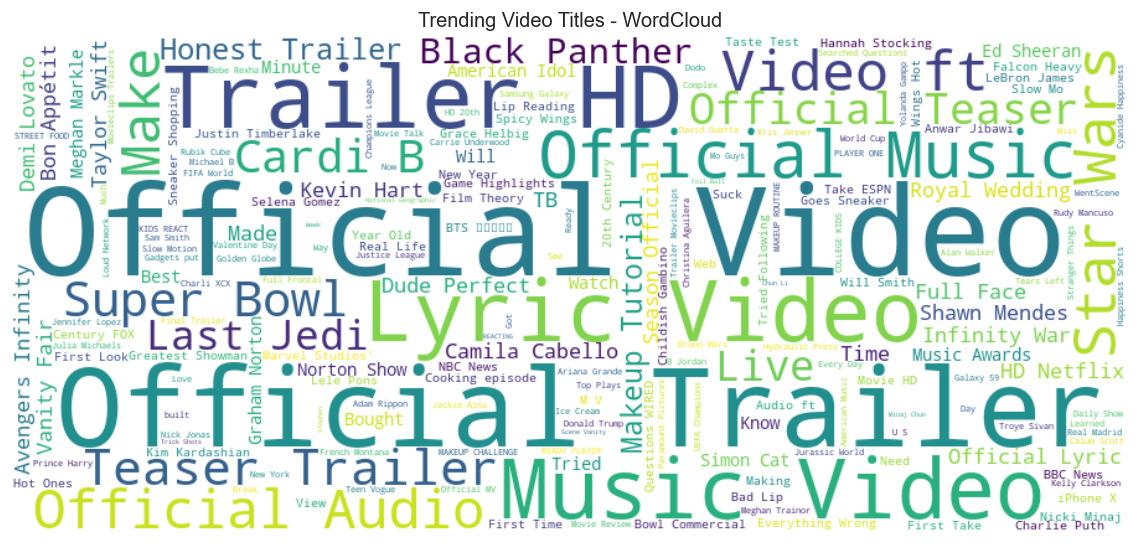

In [7]:
# --- Cell 8: WordCloud ---
text = " ".join(str(t) for t in df['title'].dropna())
wc = WordCloud(width=900, height=400, background_color="white",
               stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Trending Video Titles - WordCloud")
plt.show()

In [8]:
# --- Cell 9: Outliers ---
df['comments_per_view'] = df['comment_count'] / (df['views'] + 1)

high_views = df['views'].quantile(0.99)
low_comments = df['comments_per_view'].quantile(0.1)

outliers = df[(df['views'] >= high_views) & (df['comments_per_view'] <= low_comments)]
outliers[['title','channel_title','views','likes','comment_count']].head(10)

,title,channel_title,views,likes,comment_count
5140,42 HOLY GRAIL HACKS THAT WILL SAVE YOU A FORTUNE,5-Minute Crafts,35696409,260515,21468
5353,42 HOLY GRAIL HACKS THAT WILL SAVE YOU A FORTUNE,5-Minute Crafts,45407304,322993,21560
5575,42 HOLY GRAIL HACKS THAT WILL SAVE YOU A FORTUNE,5-Minute Crafts,54155921,378111,24679
16381,To Our Daughter,Kylie Jenner,35830721,0,0
16590,To Our Daughter,Kylie Jenner,40801423,0,0
16814,To Our Daughter,Kylie Jenner,44818108,0,0
17052,To Our Daughter,Kylie Jenner,48635732,0,0
17286,To Our Daughter,Kylie Jenner,51243149,0,0
17496,To Our Daughter,Kylie Jenner,53183123,0,0
17716,To Our Daughter,Kylie Jenner,54454945,0,0


In [9]:
os.makedirs("outputs", exist_ok=True)
avg_views.to_csv("outputs/avg_views_by_category.csv")
outliers.to_csv("outputs/outliers.csv", index=False)

In [10]:
import streamlit as st
import pandas as pd
import json

df = pd.read_csv("data/USvideos.csv")
with open("data/US_category_id.json") as f:
    cats = json.load(f)
cat_map = {int(item['id']): item['snippet']['title'] for item in cats['items']}
df['category_name'] = df['category_id'].map(cat_map)

st.title("YouTube Trending Explorer")

cat = st.selectbox("Choose category", ["All"] + sorted(df['category_name'].unique()))
if cat != "All":
    df = df[df['category_name'] == cat]

st.write(df[['title','channel_title','views','likes','comment_count']].head(10))

top_channels = df.groupby('channel_title')['views'].sum().sort_values(ascending=False).head(10)
st.bar_chart(top_channels)

2025-08-27 14:54:57.815 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 14:54:58.768 
  command:

    streamlit run C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-27 14:54:58.770 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 14:54:58.771 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 14:54:58.776 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 14:54:58.777 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 14:54:58.777 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-27 14:54:5

DeltaGenerator()